In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

import tqdm
import time
import pickle
import datetime

import torch
import sklearn.metrics

import dimod
import hybrid

from neal.sampler import SimulatedAnnealingSampler
from tabu import TabuSampler

%run ../modules/fm.ipynb
%run ../modules/qubo.ipynb
%run ../modules/trainer.ipynb
%run ../modules/ortools.ipynb

%run ../modules/proteins.ipynb

plt.style.use('dark_background')

### 2) FMQA Loop

#### FMQA

In [2]:
# Load Datasets and Regressors

DATASET_PATHES = {'f100': ['datasets/f100.csv', 'datasets/f100r.csv'],
                  'm1': ['datasets/m1.csv', 'datasets/m1r.csv'],
                  'x1': ['datasets/x1.csv', 'datasets/x1r.csv'],
                  'x100': ['datasets/x100.csv', 'datasets/x100r.csv']}

# DATASET_PATHES = {'f100': ['datasets/f100.csv'],
#                   'm1': ['datasets/m1.csv'],
#                   'x1': ['datasets/x1.csv']}

# REGRESSORS_PATH = 'regressors.pkl'
REGRESSORS_PATH = 'regressors_classic.pkl'


datasets = load_protein_datasets(DATASET_PATHES)

regressors = load_regressors(REGRESSORS_PATH)

Datasets loaded: f100 m1 x1 x100
Regressors loaded: f100 m1 x1 x100


#### One Hot FMQA Loop

In [7]:
# Initialize FMQA Loop

TARGET_PROTEIN = 'm1'

target_dataset = datasets[TARGET_PROTEIN]

splitter = Splitter(target_dataset, batch_size=100)

trainer = Trainer(splitter=splitter, embedding_dimensions=16)



# Offtarget binding energies

offtarget_proteins = set(datasets) - {TARGET_PROTEIN}

target_regressor = regressors[TARGET_PROTEIN]['regressor']
offtarget_regressors = [regressors[offtarget_protein]['regressor']
                        for offtarget_protein in offtarget_proteins]

offtarget_predictions = [offtarget_regressor.predict(target_dataset.fields) 
                         for offtarget_regressor in offtarget_regressors]

offtarget_binding_energies = np.vstack(offtarget_predictions).sum(axis=0) / len(offtarget_proteins)

initial_offtarget_binding_energies = offtarget_binding_energies

initial_target_energies = target_dataset.targets


total_iteration = 0

print("target_dataset.field_dimensions.shape:", target_dataset.field_dimensions.shape)

target_dataset.field_dimensions.shape: (110,)


Iteration 101/105
splitter.lengths: (85444, 10680, 10682)


Epoch: 1/1: 100%|█████████████████████████████████████████████████| 85.5k/85.5k [00:01<00:00, 43.8k records/s]

Train r2_score: 0.99
Test  r2_score: 0.99


x_penalties: [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.  0.  0.  0.  0.5 0.  0.  0.  0.
 0.  0.  0.  0.5 0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.  0.
 0.  0.  0.  0.5 0.  0.  0.  0.5 0.  0.  0.5 0.5 0.  0.5 0.  0.  0.  0.5
 0.5 0.5 0.  0.5 0.  0.5] 0.08333333333333333
Initial   target minimum energy:  -13.83
Iteration target minimum energy:  -16.63
Overall   target minimum energy:  -16.63

Iteration 102/105
splitter.lengths: (86244, 10780, 10782)


Epoch: 1/1: 100%|█████████████████████████████████████████████████| 86.3k/86.3k [00:01<00:00, 44.7k records/s]

Train r2_score: 0.99
Test  r2_score: 0.99


x_penalties: [0.  0.  0.  0.  0.  0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.5 0.  0.  0.  0.5 0.  0.  0.
 0.  0.5 0.  0.5] 0.075
Initial   target minimum energy:  -13.83
Iteration target minimum energy:  -16.63
Overall   target minimum energy:  -16.63

Iteration 103/105
splitter.lengths: (87044, 10880, 10882)


Epoch: 1/1: 100%|█████████████████████████████████████████████████| 87.1k/87.1k [00:01<00:00, 46.0k records/s]

Train r2_score: 0.99
Test  r2_score: 0.99


x_penalties: [0.5 0.  0.  0.  0.  0.  0.  1.  0.5 0.  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.
 0.5 0.  0.5 0.  0.5 1.  0.  0.5 0.  0.  0.  0.5 0.  0.  0.  0.5 0.5 0.
 0.  0.5 0.  0.5 0.5 0.5 0.  0.  0.5 0.  0.5 0.  0.5 0.5 0.5 0.5 0.5 0.5
 0.  0.  0.5 0.5 0.  1.5 0.5 1.  0.5 0.5 0.  1.5 0.  0.5 0.  0.5 2.  1.
 0.5 1.5 0.5 1.5 0.5 0.5 0.5 1.  1.5 1.  0.5 0.  0.  0.5 1.5 0.  0.5 1. ] 0.4388888888888889
Initial   target minimum energy:  -13.83
Iteration target minimum energy:  -16.63
Overall   target minimum energy:  -16.63

Iteration 104/105
splitter.lengths: (87844, 10980, 10982)


Epoch: 1/1: 100%|█████████████████████████████████████████████████| 87.9k/87.9k [00:02<00:00, 43.0k records/s]

Train r2_score: 0.99
Test  r2_score: 0.99


x_penalties: [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.5 0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.5 0.5 0.5 0.  0.  0.  0.  0.5 0.  0.5 0.  0.5 0.5 0.5 0.  0.5 0.5
 0.  0.5 0.  0.5 0.5 0.  0.  0.  0.  0.  0.5 0.  0.  0.5 0.5] 0.13043478260869565
Initial   target minimum energy:  -13.83
Iteration target minimum energy:  -16.63
Overall   target minimum energy:  -16.63

Iteration 105/105
splitter.lengths: (88644, 11080, 11082)


Epoch: 1/1: 100%|█████████████████████████████████████████████████| 88.7k/88.7k [00:02<00:00, 41.1k records/s]

Train r2_score: 0.99
Test  r2_score: 0.99


x_penalties: [0.5 0.5 0.5 0.  0.  0.5 0.  0.  0.  0.  0.  0.  0.5 0.  0.  0.  0.  0.
 0.  0.5 0.  0.  0.5 0.  0.  0.  0.  0.  0.  0.5 0.  0.  0.  0.  0.5 0.
 0.  0.  0.5 0.5 0.  0.5 0.  0.5 0.  0.  1.  0.  0.5 0.  0.  0.  0.5 0.
 0.  1.  0.  0.5 0.  0.  0.  0.  0.  0.  0.5 0.  0.5 0.5 0.  0.  0.  0.5
 0.5 0.  0.  0.  0.5 0.5 1.  0.5 1.  1. ] 0.2073170731707317
Initial   target minimum energy:  -13.83
Iteration target minimum energy:  -16.63
Overall   target minimum energy:  -16.63



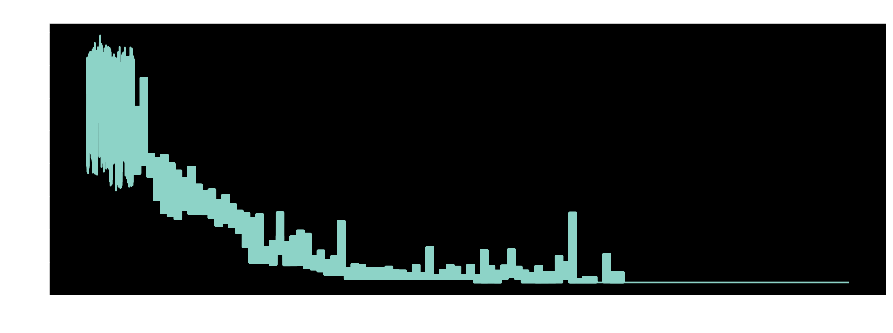

0     XKYWENCFPLKRHIQYNVNAAY
1     XPYWENCFFLCRFIQTNVNFAY
2     IKYWCLCFFLQRPIQXNVNAAY
3     IFYWCLCFFLPRFIQWNVNFAY
4     IKYWCLCFFLKRPIQTNVNFTY
               ...          
77    XKWWCNCFFLKRPIQYNVNADY
78    IFYWCNCFFLPXFIQXNVNATY
79    IFYXCLGFFLARPIQYNVNFCY
80    XFYWENGFFLPRPIQTNVNAAX
81    XAYWENCFFLQRFIQVLVNACX
Name: symbols, Length: 82, dtype: object


In [15]:
ITERATIONS_COUNT = 5

INITIAL_EPOCHS_COUNT = 100
EPOCHS_COUNT = 1
DATASET_SHARE = 1

TOP_SIZE = 10
SAMPLE_REPETITIONS_COUNT = 100

SHOTS_COUNT = 100
PENALTY_VALUE = 10
MAXIMIZE = False

SAMPLER = TabuSampler()
# SAMPLER = ORToolsSampler()
# SAMPLER = OneHotRandomSampler()
# SAMPLER = hybrid.KerberosSampler()

ORTOOLS_TIME_LIMIT = 10

total_iterations_count = total_iteration + ITERATIONS_COUNT


for iteration in range(ITERATIONS_COUNT):
    
    total_iteration += 1
    
    print(f"Iteration {total_iteration}/{total_iterations_count}")
    
    splitter = Splitter(target_dataset, batch_size=100,
                        dataset_share=DATASET_SHARE)
    
    print("splitter.lengths:", splitter.lengths)

    trainer = Trainer(splitter=splitter, 
                      embedding_dimensions=16,
                      model=trainer.model,
                      # optimizer=trainer.optimizer
                     )
       
    epochs_count = INITIAL_EPOCHS_COUNT if total_iteration == 1 else EPOCHS_COUNT
    
    trainer.train(epochs=epochs_count, validate=False)

    qubo = OneHotQubo(trainer=trainer,
                      penalty_value=PENALTY_VALUE,
                      maximize=MAXIMIZE)    

    sampling_results = SAMPLER.sample_qubo(Q=qubo.qubo_coefficients, 
                                           num_reads=SHOTS_COUNT,
                                           time_limit=ORTOOLS_TIME_LIMIT)
    
    aggregated_results = sampling_results.aggregate()
    filtered_results = aggregated_results.filter(pred=qubo.is_correct_one_hot)
    
    decoded_results = decode_sampling_results(qubo, target_dataset, filtered_results)
    
    if len(decoded_results):
        results = add_energies(decoded_results)
    else:
        print("No Samples")
        continue

    
    # Top results
    
    top_results = results.sort_values(by='binding_energy', ascending=True)[:TOP_SIZE]
    
    new_fields = np.vstack(top_results['bits'].to_numpy())
    new_targets = top_results['target_binding_energy'].to_numpy()
    

    # Append - Target binding energies
    
    target_dataset.append_records(new_fields, new_targets, SAMPLE_REPETITIONS_COUNT)
    
    
    # Append - Offtarget binding energies
    
    new_offtarget_binding_energies = np.tile(top_results['offtarget_binding_energy'], 
                                             (SAMPLE_REPETITIONS_COUNT, 1))
    
    offtarget_binding_energies = np.append(offtarget_binding_energies, new_offtarget_binding_energies)

    print(f"Initial   target minimum energy:  {initial_target_energies.min():.02f}")    
    print(f"Iteration target minimum energy:  {results['target_binding_energy'].min():.02f}")
    print(f"Overall   target minimum energy:  {target_dataset.targets.min():.02f}")
    print()
    # print(f"Initial   offtarget maximum energy: {initial_offtarget_binding_energies.max():.02f}")    
    # print(f"Iteration offtarget maximum energy: {results['offtarget_binding_energy'].max():.02f}")
    # print(f"Overall   offtarget maximum energy: {offtarget_binding_energies.max():.02f}")
    # print()
        
# Plots

plt.figure(figsize=(15, 5))
plt.title("FMQA - Target Binding Energies")
plt.xlabel("Peptide")
plt.ylabel("Target Binding Energy")

plt.plot(target_dataset.targets)
plt.show()

print(results.symbols)

# plt.figure(figsize=(15, 5))
# plt.title("FMQA - Offtarget Binding Energies")
# plt.xlabel("Peptide")
# plt.ylabel("Offtarget Binding Energy")

# plt.plot(offtarget_binding_energies)
# plt.show()

In [ ]:
# np.save('qubo_proteins.npy', qubo.coupling_matrix)

#### One Cold FMQA Loop

In [3]:
# Initialize FMQA Loop

TARGET_PROTEIN = 'm1'

target_dataset = datasets[TARGET_PROTEIN]

splitter = Splitter(target_dataset, batch_size=100)

model = OneColdFactorizationMachine(
    field_dimensions=splitter.dataset.field_dimensions,
    embedding_dimensions=16, 
    include_linear=False
)

trainer = Trainer(splitter=splitter, model=model)

initial_target_energies = target_dataset.targets


# Offtarget binding energies

offtarget_proteins = set(datasets) - {TARGET_PROTEIN}

target_regressor = regressors[TARGET_PROTEIN]['regressor']
offtarget_regressors = [regressors[offtarget_protein]['regressor']
                        for offtarget_protein in offtarget_proteins]

offtarget_predictions = [offtarget_regressor.predict(target_dataset.fields) 
                         for offtarget_regressor in offtarget_regressors]

offtarget_binding_energies = np.vstack(offtarget_predictions).sum(axis=0) / len(offtarget_proteins)

initial_offtarget_binding_energies = offtarget_binding_energies

total_iteration = 0

print("target_dataset.field_dimensions.shape:", target_dataset.field_dimensions.shape)

target_dataset.field_dimensions.shape: (110,)


Iteration 101/105
splitter.lengths: (40804, 5100, 5102)


Epoch: 1/1: 100%|█████████████████████████████████████████████████| 40.9k/40.9k [00:00<00:00, 49.6k records/s]

Train r2_score: 0.99
Test  r2_score: 0.99


x_penalties: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0.0
Initial   target minimum energy:  -13.83
Iteration target minimum energy:  -16.42
Overall   target minimum energy:  -16.40

Iteration 102/105
splitter.lengths: (41604, 5200, 5202)


Epoch: 1/1: 100%|█████████████████████████████████████████████████| 41.7k/41.7k [00:00<00:00, 50.7k records/s]

Train r2_score: 0.99
Test  r2_score: 0.99


x_penalties: [0.  0.  0.  0.  0.  0.  1.  0.  0.  1.5 0.  0.5 0.  1.5 0.  0.  1.  0.
 1.5 0.  0.5 0.  0.  0.  0.  0.  0.5 0.  0.5 0.  0.5 0.  0.5] 0.2878787878787879
Initial   target minimum energy:  -13.83
Iteration target minimum energy:  -16.42
Overall   target minimum energy:  -16.42

Iteration 103/105
splitter.lengths: (42404, 5300, 5302)


Epoch: 1/1: 100%|█████████████████████████████████████████████████| 42.5k/42.5k [00:00<00:00, 52.8k records/s]

Train r2_score: 0.99
Test  r2_score: 0.99


x_penalties: [0.5 0.5 0.5 1.  0.5 0.5 0.5 0.5 0.  0.5 0.  0.  0.5 1.  0.  1.  1.  1.
 0.  0.5 0.  0.  1.  0.5 1.  0.5 0.5 0.5 0.5 1.5 1.  0.5] 0.546875
Initial   target minimum energy:  -13.83
Iteration target minimum energy:  -16.46
Overall   target minimum energy:  -16.46

Iteration 104/105
splitter.lengths: (43204, 5400, 5402)


Epoch: 1/1: 100%|█████████████████████████████████████████████████| 43.3k/43.3k [00:00<00:00, 52.9k records/s]

Train r2_score: 0.99
Test  r2_score: 0.99


x_penalties: [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 1.  0.5 0.  0.  1.
 0.5] 0.14864864864864866
Initial   target minimum energy:  -13.83
Iteration target minimum energy:  -16.46
Overall   target minimum energy:  -16.46

Iteration 105/105
splitter.lengths: (44004, 5500, 5502)


Epoch: 1/1: 100%|█████████████████████████████████████████████████| 44.1k/44.1k [00:00<00:00, 56.2k records/s]

Train r2_score: 0.99
Test  r2_score: 0.99


x_penalties: [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.5] 0.018518518518518517
Initial   target minimum energy:  -13.83
Iteration target minimum energy:  -16.46
Overall   target minimum energy:  -16.46



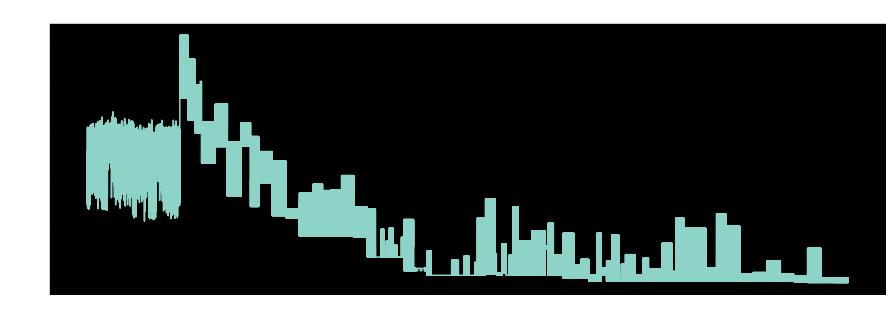

0     GQYWEEQFCVNFRIIHLLNEYY
1     QQYWEEQFEVNFSIGHLLNEYY
2     QQEWEEQFEVNFRIGHLLNEYY
3     QQYWEEQFCVNFRIGHLLNIEY
4     QQYWIYQFEVNFSEGHCLNEYE
5     QQYWCESFEVLFRIGHLLNIEY
6     QQYWEEQFEVNFRIGHKLNIYY
7     GQYWENQFCVNFSIIHLLNEYY
8     QQYWEEQFEVNFRIGHKQNEYY
9     IQEWCNQFNVLFRIGDLLNEYY
10    QQYWIEQFEVNFSIGHLLNEEY
11    QQYWEEQFEVNPREGHLLNEYY
12    QQYWYEQFEVNFRIGHKLNEEY
13    IQYWCEQFEVLHRIGHLLNEYY
14    QQYWCEQFYVNFRIGHLLNEEY
15    QQYWEEQFYVNFRIGHLLNIEY
16    GQYWEEQFEVLIRIGHLLNIYY
17    GQYWIEQFEYNFSIGHLLNLYY
18    QQYWENGFNVNGSIGHCLNIEE
19    GQYWGNQANYNFSIGDLLNAYY
20    SQYWENGFNVNFSIGHCLNIEE
21    QQYWDEQFEVNPREGHKLNEYY
22    GQYWCNQANYNFSIGHLLNAYY
23    GQYWCNQANYNFRIGHKLNFYY
24    QQYWIEIFEVNFSIGHCLNEEE
25    GQYWIYQASYNFRIGHLLNAYY
26    IQYWCNQANVNFSIGHLLXCYY
Name: symbols, dtype: object


In [ ]:
ITERATIONS_COUNT = 5

INITIAL_EPOCHS_COUNT = 100
EPOCHS_COUNT = 1
DATASET_SHARE = 1

TOP_SIZE = 10
SAMPLE_REPETITIONS_COUNT = 100

SHOTS_COUNT = 100
PENALTY_VALUE = 10
MAXIMIZE = False

SAMPLER = TabuSampler()
# SAMPLER = ORToolsSampler()
# SAMPLER = OneHotRandomSampler()
# SAMPLER = hybrid.KerberosSampler()

ORTOOLS_TIME_LIMIT = 10

total_iterations_count = total_iteration + ITERATIONS_COUNT


for iteration in range(ITERATIONS_COUNT):
    
    total_iteration += 1
    
    print(f"Iteration {total_iteration}/{total_iterations_count}")
    
    splitter = Splitter(target_dataset, batch_size=100,
                        dataset_share=DATASET_SHARE)
    
    print("splitter.lengths:", splitter.lengths)

    trainer = Trainer(splitter=splitter, model=trainer.model)
       
    epochs_count = INITIAL_EPOCHS_COUNT if total_iteration == 1 else EPOCHS_COUNT
    
    trainer.train(epochs=epochs_count, validate=False)

    qubo = OneColdQubo(trainer=trainer, maximize=MAXIMIZE)    

    sampling_results = SAMPLER.sample_qubo(Q=qubo.qubo_coefficients, 
                                           num_reads=SHOTS_COUNT,
                                           time_limit=ORTOOLS_TIME_LIMIT)
    
    aggregated_results = sampling_results.aggregate()
    
    decoded_results = one_cold_decode_sampling_results(qubo, target_dataset, aggregated_results)   
  

    if len(decoded_results):
        results = add_energies(decoded_results)
    else:
        print("No Samples")
        continue

    
    # Top results
    
    top_results = results.sort_values(by='binding_energy', ascending=True)[:TOP_SIZE]
    
    new_fields = np.vstack(top_results['bits'].to_numpy())
    new_targets = top_results['target_binding_energy'].to_numpy()
    

    # Append - Target binding energies
    
    target_dataset.append_records(new_fields, new_targets, SAMPLE_REPETITIONS_COUNT)
    
    
    # Append - Offtarget binding energies
    
    new_offtarget_binding_energies = np.tile(top_results['offtarget_binding_energy'], 
                                             (SAMPLE_REPETITIONS_COUNT, 1))
    
    offtarget_binding_energies = np.append(offtarget_binding_energies, new_offtarget_binding_energies)

    print(f"Initial   target minimum energy:  {initial_target_energies.min():.02f}")    
    print(f"Iteration target minimum energy:  {results['target_binding_energy'].min():.02f}")
    print(f"Overall   target minimum energy:  {target_dataset.targets.min():.02f}")
    print()
    # print(f"Initial   offtarget maximum energy: {initial_offtarget_binding_energies.max():.02f}")    
    # print(f"Iteration offtarget maximum energy: {results['offtarget_binding_energy'].max():.02f}")
    # print(f"Overall   offtarget maximum energy: {offtarget_binding_energies.max():.02f}")
    # print()
        
# Plots

plt.figure(figsize=(15, 5))
plt.title("FMQA - Target Binding Energies")
plt.xlabel("Peptide")
plt.ylabel("Target Binding Energy")

plt.plot(target_dataset.targets)
plt.show()

print(results.symbols)

# plt.figure(figsize=(15, 5))
# plt.title("FMQA - Offtarget Binding Energies")
# plt.xlabel("Peptide")
# plt.ylabel("Offtarget Binding Energy")

# plt.plot(offtarget_binding_energies)
# plt.show()

In [5]:
# np.save('qubo_proteins.npy', qubo.coupling_matrix)

#### FMQA Results

In [15]:
top_results = results.sort_values('binding_energy', ignore_index=True)

# top_results.to_csv('results_06_12_2022.csv')

top_results.drop(columns=['decimal', 'bits', 'num_occurrences'])

,samples,symbols,qubo_energy,target_binding_energy,offtarget_binding_energy,binding_energy
0,"[0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, ...",QQYWEEQFEVNFRIGHKQNEYY,-16.246276,-16.355515,-10.499178,-5.856337
1,"[0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, ...",GQYWEEQFEVLIRIGHLLNIYY,-16.212870,-16.296612,-10.525996,-5.770616
2,"[0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, ...",IQEWCNQFNVLFRIGDLLNEYY,-16.245987,-16.462421,-10.939004,-5.523417
3,"[0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, ...",QQYWEEQFEVNFRIGHKLNIYY,-16.268166,-16.335552,-10.883296,-5.452256
4,"[0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, ...",IQYWCEQFEVLHRIGHLLNEYY,-16.223307,-16.258976,-10.834701,-5.424275
5,"[0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, ...",QQEWEEQFEVNFRIGHLLNEYY,-16.316278,-16.462654,-11.043178,-5.419477
6,"[0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, ...",GQYWENQFCVNFSIIHLLNEYY,-16.258499,-16.354563,-10.935181,-5.419382
7,"[0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, ...",QQYWIEQFEVNFSIGHLLNEEY,-16.241596,-16.337914,-10.931443,-5.406470
8,"[0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, ...",QQYWEEQFYVNFRIGHLLNIEY,-16.213057,-16.404175,-11.038857,-5.365317
9,"[0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, ...",GQYWEEQFCVNFRIIHLLNEYY,-16.324631,-16.404175,-11.038857,-5.365317


#### Docking Results

In [17]:
docking_results = pd.read_csv('results/docking_results_19_12_2022.csv')

docking_results.head()

,peptide_index,peptide,target_binding_energy,tool,target,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,model_10
0,1,GRYWCEQGQCLHMIGDNGNANW,-14.87,HPEPDOCK,m1,-231.9,-226.9,-222.7,-221.2,-219.6,-219.0,-217.8,-217.6,-216.5,-213.8
1,1,GRYWCEQGQCLHMIGDNGNANW,-14.87,HPEPDOCK,f100,-208.4,-205.7,-201.0,-199.9,-198.6,-197.2,-196.9,-196.0,-194.8,-194.6
2,1,GRYWCEQGQCLHMIGDNGNANW,-14.87,HPEPDOCK,x1,-231.9,-229.7,-226.4,-225.4,-224.0,-223.2,-223.0,-220.7,-220.5,-218.6
3,1,GRYWCEQGQCLHMIGDNGNANW,-14.87,MDockPeP,m1,-220.5,-220.4,-218.6,-218.0,-218.0,-217.7,-217.5,-217.2,-216.9,-214.7
4,1,GRYWCEQGQCLHMIGDNGNANW,-14.87,MDockPeP,f100,-225.0,-220.2,-216.4,-216.1,-214.6,-214.1,-212.5,-210.9,-210.7,-210.2


In [18]:
peptide_enegries = docking_results[['peptide', 'target_binding_energy']].drop_duplicates()

peptide_enegries

,peptide,target_binding_energy
0,GRYWCEQGQCLHMIGDNGNANW,-14.87
6,GRYWEGQGSCLHRIGDNGNCNW,-14.86
12,GQSADDIIAQLIRMADDHQAQY,-9.32
18,GQWKREIGALLRRPADKLNAQF,-9.10


In [19]:
docking_tools = docking_results['tool'].drop_duplicates()

docking_tools

0    HPEPDOCK
3    MDockPeP
Name: tool, dtype: object

In [20]:
targets = docking_results['target'].drop_duplicates()

targets

0      m1
1    f100
2      x1
Name: target, dtype: object

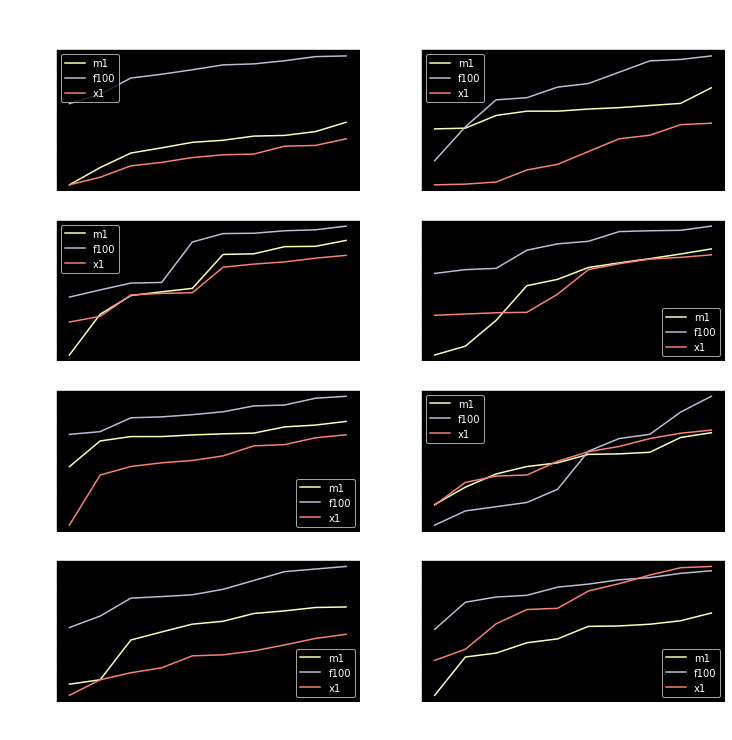

In [21]:
COLORS = {'m1': 'C1',
          'f100': 'C2',
          'x1': 'C3'}

RANKS = dict(zip(peptide_enegries.peptide, 
                 ['Top-1', 'Top-2', 'Bottom-2', 'Bottom-1']))

figure, axes = plt.subplots(nrows=4, ncols=2,
                            # sharey=True,
                            sharex=True,
                            figsize=(12, 12))

figure.suptitle('Binding Energies - HPEPDOCK and MDockPeP', y=0.93)

for column_index, docking_tool in enumerate(docking_tools):
    
    # axes[0, column_index].set_title(docking_tool)
    
    for row_index, peptide in enumerate(peptide_enegries.peptide):
        
        axes[row_index, column_index].set_title(RANKS[peptide] + ' - ' + peptide)
        
        axes[row_index, 0].set_ylabel('Energy')

        target_binding_energies = docking_results[(docking_results.tool == docking_tool) & 
                                                  (docking_results.peptide == peptide)]
        
        targets_energies = target_binding_energies.filter(regex='^target$|^model_')

        targets_energies.set_index('target', inplace=True)
        
        for target, target_energies in targets_energies.T.items():
            
            color = COLORS[target]

            axes[row_index, column_index].plot(target_energies.to_numpy(), label=target, color=color)
            
            axes[row_index, column_index].legend()

        # energies = target_binding_energies.filter(like='model_').to_numpy()

        # axes[row_index, column_index].plot(energies.T)
        # axes[row_index, column_index].xaxis.set_visible(False)

        # axes[row_index, column_index].axis('off')
        # axes[row_index, column_index].set_ylabel('Energy')
   
    axes[row_index, column_index].set_xlabel("Model")

#### Full Results

In [94]:
results_records = []

for fields, target in zip(target_dataset.fields, target_dataset.targets):
    
    symbols = target_dataset.decode(fields)
    
    results_record = {'symbols': symbols,
                      'target_binding_energy': target}
    
    results_records.append(results_record)

In [111]:
full_results = pd.DataFrame(results_records)
full_results = full_results.drop_duplicates()
full_results = full_results.sort_values('target_binding_energy', ignore_index=True)

full_results.head()

,symbols,target_binding_energy
0,GRYWCEQGQCLHMIGDNGNANW,-14.865304
1,GRYWCCQGQCLHMIGDNGNANW,-14.865304
2,GRYWCCQGQCLHMIQDNGNANW,-14.865304
3,GRYWCCQGSCLHAIGDNGNAEW,-14.865304
4,GRYWCEQGQCCHMIGDNGNANW,-14.865304


In [106]:
full_results.loc[full_results.symbols == 'GRYWEGQGSCLHRIGDNGNCNW']

,symbols,target_binding_energy
11,GRYWEGQGSCLHRIGDNGNCNW,-14.861834


In [113]:
# full_results.to_csv('results_15_12_2022.csv')

### 1.0) Train XGBoost Regressors

In [ ]:
# Train Regressors Classic

import xgboost as xgb

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


# MAX_DEPTH = 7
ESTIMATORS_COUNT = 1000


regressors = dict()
regressor_r2_scores = []

for dataset_name, dataset in datasets.items():
    
    print("dataset_name:", dataset_name)

    regressor = xgb.XGBRegressor(eval_metric=r2_score, 
                                 # max_depth=MAX_DEPTH, 
                                 n_estimators=ESTIMATORS_COUNT
                                )
    
    train_fields, test_fields, train_targets, test_targets = train_test_split(dataset.fields,
                                                                              dataset.targets,
                                                                              test_size=0.2)
    regressor.fit(train_fields, train_targets)
    
    regressors[dataset_name] = {'regressor': regressor}
    
    score = regressor.score(test_fields, test_targets)

    regressor_r2_scores.append(score)
    
print("regressor_r2_scores:", regressor_r2_scores)


# dataset_name: f100
# dataset_name: m1
# dataset_name: x1
# regressor_r2_scores: [0.40288274970605686, 0.6405254022927871, 0.5571315473724631]

# regressor_r2_scores: [0.5828579231036269, 0.8218700057365956, 0.5695950876325806, 0.49032957742570915]

In [ ]:
# # Save Regressors Classic

# with open('regressors_classic.pkl', 'wb') as handle:
#     pickle.dump(regressors, handle, protocol=pickle.HIGHEST_PROTOCOL)

### 1.1) FM Models Comparison

#### Comparison - One Hot to One Cold

In [28]:
%run ../finance/modules/fm.ipynb
%run ../finance/modules/trainer.ipynb

dataset = ProteinsDataset(fields_column='protein')
dataset.extend('datasets/m1.csv')

splitter = Splitter(dataset, batch_size=100)

#### 1) One Hot

In [29]:
model = OneHotFactorizationMachine(
    field_dimensions=splitter.dataset.field_dimensions,
    embedding_dimensions=16, 
    include_linear=False
)

one_hot_trainer = Trainer(splitter=splitter, model=model)

In [30]:
EPOCHS_COUNT = 300

one_hot_trainer.train(epochs=EPOCHS_COUNT, validate=True)

one_hot_scores = one_hot_trainer.validation_scores

Epoch: 300/300: 100%|███████████████████████████████████████| 810k/810k [00:35<00:00, 23.0k records/s, v=0.48]

Train r2_score: 0.77
Test  r2_score: 0.57


#### 2) One Hot + Linear

In [31]:
model = OneHotFactorizationMachine(
    field_dimensions=splitter.dataset.field_dimensions,
    embedding_dimensions=16, 
    include_linear=True
)

one_hot_linear_trainer = Trainer(splitter=splitter, model=model)

In [32]:
EPOCHS_COUNT = 300

one_hot_linear_trainer.train(epochs=EPOCHS_COUNT, validate=True)

one_hot_linear_scores = one_hot_linear_trainer.validation_scores

Epoch: 300/300: 100%|███████████████████████████████████████| 810k/810k [00:48<00:00, 16.6k records/s, v=0.45]

Train r2_score: 0.70
Test  r2_score: 0.50


#### 3) One Cold

In [33]:
model = OneColdFactorizationMachine(
    field_dimensions=splitter.dataset.field_dimensions,
    embedding_dimensions=16, 
    include_linear=False
)

one_cold_trainer = Trainer(splitter=splitter, model=model)

In [34]:
EPOCHS_COUNT = 300

one_cold_trainer.train(epochs=EPOCHS_COUNT, validate=True)

one_cold_scores = one_cold_trainer.validation_scores

Epoch: 300/300: 100%|███████████████████████████████████████| 810k/810k [00:25<00:00, 32.1k records/s, v=0.53]

Train r2_score: 0.76
Test  r2_score: 0.55


#### 4) One Cold + Linear

In [35]:
model = OneColdFactorizationMachine(
    field_dimensions=splitter.dataset.field_dimensions,
    embedding_dimensions=16, 
    include_linear=True
)

one_cold_linear_trainer = Trainer(splitter=splitter, model=model)

In [36]:
EPOCHS_COUNT = 300

one_cold_linear_trainer.train(epochs=EPOCHS_COUNT, validate=True)

one_cold_linear_scores = one_cold_linear_trainer.validation_scores

Epoch: 300/300: 100%|███████████████████████████████████████| 810k/810k [00:30<00:00, 26.7k records/s, v=0.54]

Train r2_score: 0.76
Test  r2_score: 0.59


#### 5) Comparison Plot

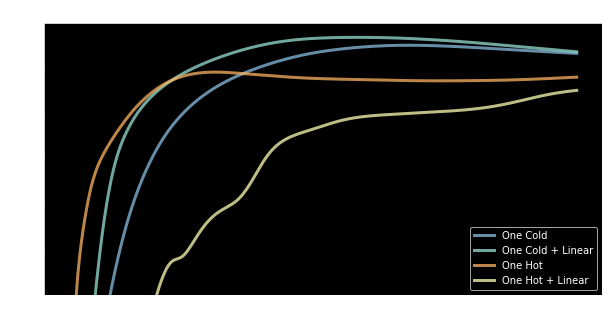

In [42]:
plt.subplots(figsize=(10, 5))

plt.plot(one_cold_scores, label='One Cold', color='C4', lw=3, alpha=0.8)
plt.plot(one_cold_linear_scores, label='One Cold + Linear', color='C0', lw=3, alpha=0.8)
plt.plot(one_hot_scores, label='One Hot', color='C5', lw=3, alpha=0.75)
plt.plot(one_hot_linear_scores, label='One Hot + Linear', color='C1', lw=3, alpha=0.75)

plt.ylim(ymin=0, ymax=0.6)
# plt.xlim(xmax=350)

plt.title("Validation R2 Score Evolution")
plt.xlabel("Epoch")
plt.ylabel("R2 Score")

plt.legend()
plt.show()

### 1.2) Hyperparameter Searches

In [ ]:
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [6]:
# Load Regressors Ensemble

with open('regressors_ensemble.pkl', 'rb') as handle:
    regressors_ensemble = pickle.load(handle)

In [7]:
def grid_search_regressors(regressor_name, regressor, parameters, datasets,
                           scoring='r2', cv=5, verbose=2, test_size=0.2):
    
    regressors_records = {dataset_name: dict() for dataset_name in datasets}

    for dataset_name, dataset in datasets.items():

        print()
        print("dataset_name:", dataset_name)
        print("dataset.fields.shape:", dataset.fields.shape)

        gridsearch = GridSearchCV(regressor, parameters, 
                                  scoring=scoring, cv=cv, verbose=verbose, 
                                  error_score='raise')

        train_fields, test_fields, train_targets, test_targets = train_test_split(dataset.fields,
                                                                                  dataset.targets,
                                                                                  test_size=test_size)
        gridsearch.fit(X=train_fields, y=train_targets)

        best_regressor = gridsearch.best_estimator_
        best_parameters = gridsearch.best_params_

        train_predictions = best_regressor.predict(train_fields)
        test_predictions = best_regressor.predict(test_fields)

        best_train_r2_score = r2_score(train_targets, train_predictions)
        best_test_r2_score = r2_score(test_targets, test_predictions)

        regressor_record = {'regressor_class': best_regressor.__class__,
                            'best_parameters': best_parameters,
                            'best_train_r2_score': best_train_r2_score,
                            'best_test_r2_score': best_test_r2_score}

        regressors_records[dataset_name][regressor_name] = regressor_record

        print(f"Best Parameters: {best_parameters}")
        print(f"R2 Train: {best_train_r2_score:.02f}")
        print(f"R2 Test:  {best_test_r2_score:.02f}")
        
    return regressors_records


def update_regressors_ensemble(regressors_ensemble, new_regressors_records):

    for dataset_name, old_regressors_records in regressors_ensemble.items():

        for new_regressor_name, new_regressor_record in new_regressors_records[dataset_name].items():

            old_regressors_records[new_regressor_name] = new_regressor_record
            
            
def remove_regressor(regressors_ensemble, regressor_name):

    for dataset_name, regressors_records in regressors_ensemble.items():
        
        regressors_records.pop(regressor_name, None)

#### 1) GXBoost

In [27]:
PARAMETERS = {'max_depth': [None, 3, 7],
              'n_estimators': [100, 200, 300],
              'learning_rate': [0.05, 0.2],
              'reg_alpha': [0, 0.03]}

new_regressors_records = grid_search_regressors(regressor_name='xgboost', 
                                                regressor=XGBRegressor(), 
                                                parameters=PARAMETERS, 
                                                datasets=datasets)

# update_regressors_ensemble(regressors_ensemble, new_regressors_records)


dataset_name: f100
dataset.fields.shape: (1292, 110)
Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END learning_rate=0.05, max_depth=None, n_estimators=100, reg_alpha=0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=None, n_estimators=100, reg_alpha=0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=None, n_estimators=100, reg_alpha=0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=None, n_estimators=100, reg_alpha=0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=None, n_estimators=100, reg_alpha=0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=None, n_estimators=100, reg_alpha=0.03; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=None, n_estimators=100, reg_alpha=0.03; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=None, n_estimators=100, reg_alpha=0.03; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=None, n_estimators=100, reg_alpha=0.03; total time=   0.1s
[CV] END learning

KeyboardInterrupt: 

#### 2) Random Forest

In [15]:
PARAMETERS = {'max_depth': [2, 5, 10, 20, 50, None],
              # 'max_features': [None, 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [50, 100, 300, 500],
              'ccp_alpha': [0, 0.01, 0.05]}

new_regressors_records = grid_search_regressors(regressor_name='random_forest', 
                                                regressor=RandomForestRegressor(), 
                                                parameters=PARAMETERS, datasets=datasets)

# update_regressors_ensemble(regressors_ensemble, new_regressors_records)


dataset_name: f100
dataset.fields.shape: (1292, 110)
Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV] END ccp_alpha=0, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END ccp_alpha=0, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END ccp_alpha=0, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END ccp_alpha=0, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END ccp_alpha=0, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END ccp_alpha=0, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END ccp_alpha=0, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s


KeyboardInterrupt: 

In [8]:
# # Save Random Forest Regressors

# with open('regressors_ensemble.pkl', 'wb') as handle:
#     pickle.dump(regressors_ensemble, handle, protocol=pickle.HIGHEST_PROTOCOL)

#### 3) SVR

In [28]:
PARAMETERS = {    
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [0, 1, 2, 3, 4, 5],
    # 'gamma': ['scale', 'auto']
}    

new_regressors_records = grid_search_regressors(regressor_name='svr', 
                                                regressor=SVR(), 
                                                parameters=PARAMETERS, datasets=datasets)

update_regressors_ensemble(regressors_ensemble, new_regressors_records)


dataset_name: f100
dataset.fields.shape: (1292, 110)
Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ............................degree=0, kernel=linear; total time=   0.2s
[CV] END ............................degree=0, kernel=linear; total time=   0.2s
[CV] END ............................degree=0, kernel=linear; total time=   0.2s
[CV] END ............................degree=0, kernel=linear; total time=   0.1s
[CV] END ............................degree=0, kernel=linear; total time=   0.2s
[CV] END ..............................degree=0, kernel=poly; total time=   0.1s
[CV] END ..............................degree=0, kernel=poly; total time=   0.1s
[CV] END ..............................degree=0, kernel=poly; total time=   0.1s
[CV] END ..............................degree=0, kernel=poly; total time=   0.1s
[CV] END ..............................degree=0, kernel=poly; total time=   0.1s
[CV] END ...............................degree=0, kernel=rbf; total time= 

KeyboardInterrupt: 

In [86]:
# # Save Regressors Ensemble

# with open('regressors_ensemble.pkl', 'wb') as handle:
#     pickle.dump(regressors_ensemble, handle, protocol=pickle.HIGHEST_PROTOCOL)

#### 4) KNN

In [29]:
PARAMETERS = {
    'n_neighbors': list(range(5, 30)),
    # 'n_neighbors': [10],
    # 'weights': ['distance'],
    'algorithm': ['auto'],
    # 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    # 'leaf_size': list(range(0, 100, 10))
    # 'p': [1, 2, 3, 4, 5],
             }

new_regressors_records = grid_search_regressors(regressor_name='knn', 
                                                regressor=KNeighborsRegressor(), 
                                                parameters=PARAMETERS,
                                                verbose=1,
                                                datasets=datasets)


dataset_name: f100
dataset.fields.shape: (1292, 110)
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 15}
R2 Train: 0.31
R2 Test:  0.19

dataset_name: m1
dataset.fields.shape: (3326, 110)
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 17}
R2 Train: 0.48
R2 Test:  0.44

dataset_name: x1
dataset.fields.shape: (2679, 110)
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 15}
R2 Train: 0.57
R2 Test:  0.42


In [84]:
# update_regressors_ensemble(regressors_ensemble, new_regressors_records)

#### 5) AdaBoost

In [30]:
PARAMETERS = {
    'n_estimators': list(range(4, 16)),
    # 'n_estimators': [10],
    'loss': ['linear', 'square', 'exponential'],
}

new_regressors_records = grid_search_regressors(regressor_name='adaboost', 
                                                regressor=AdaBoostRegressor(), 
                                                parameters=PARAMETERS,
                                                verbose=1,
                                                datasets=datasets)


dataset_name: f100
dataset.fields.shape: (1292, 110)
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'loss': 'linear', 'n_estimators': 13}
R2 Train: 0.22
R2 Test:  0.18

dataset_name: m1
dataset.fields.shape: (3326, 110)
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'loss': 'linear', 'n_estimators': 6}
R2 Train: 0.39
R2 Test:  0.31

dataset_name: x1
dataset.fields.shape: (2679, 110)
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'loss': 'linear', 'n_estimators': 4}
R2 Train: 0.42
R2 Test:  0.39


In [41]:
# update_regressors_ensemble(regressors_ensemble, new_regressors_records)

#### 6) Bayesian Ridge

In [31]:
PARAMETERS = {
    'n_iter': [1, 10, 50, 100, 200, 300, 400, 500],
}

new_regressors_records = grid_search_regressors(regressor_name='bayesian_ridge', 
                                                regressor=BayesianRidge(), 
                                                parameters=PARAMETERS,
                                                verbose=1,
                                                datasets=datasets)


dataset_name: f100
dataset.fields.shape: (1292, 110)
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'n_iter': 1}
R2 Train: 0.41
R2 Test:  0.37

dataset_name: m1
dataset.fields.shape: (3326, 110)
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'n_iter': 1}
R2 Train: 0.46
R2 Test:  0.44

dataset_name: x1
dataset.fields.shape: (2679, 110)
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'n_iter': 1}
R2 Train: 0.51
R2 Test:  0.49


In [43]:
# update_regressors_ensemble(regressors_ensemble, new_regressors_records)

#### 7) FM - Trainers

In [5]:
# EMBEDDING_DIMENSIONS = [4, 8, 16, 32]
# BATCH_SIZES = [90, 100, 110]

EMBEDDING_DIMENSIONS = 16
BATCH_SIZE = 100

EPOCHS_COUNT = 100


trained_fm_regressors = {dataset_name: dict() for dataset_name in datasets}


for dataset_name, dataset in datasets.items():

    print()
    print("dataset_name:", dataset_name)
    print("dataset.fields.shape:", dataset.fields.shape)
    
    splitter = Splitter(dataset, batch_size=BATCH_SIZE)

    trainer = Trainer(splitter=splitter, embedding_dimensions=EMBEDDING_DIMENSIONS)

    trainer.train(epochs=EPOCHS_COUNT, validate=False)

    train_predictions, train_r2_score = trainer.batch_predict(splitter.train_data_loader)
    test_predictions, test_r2_score = trainer.batch_predict(splitter.test_data_loader)
    
    regressor_results = {'trained_regressor': trainer,
                         'train_r2_score': train_r2_score,
                         'test_r2_score': test_r2_score}

    trained_fm_regressors[dataset_name]['fm'] = regressor_results    

    print("train_r2_score:", train_r2_score)
    print("test_r2_score:", test_r2_score)


dataset_name: f100
dataset.fields.shape: (1292, 110)


Epoch: 100/100:  91%|█████████████████████████████████████████▊    | 1000/1100 [00:06<00:00, 154.63 batches/s]

Test r2_score: 0.22773


train_r2_score: 0.4600802007501519
test_r2_score: 0.22773266010375404

dataset_name: m1
dataset.fields.shape: (3326, 110)


Epoch: 100/100:  74%|██████████████████████████████████            | 2000/2700 [00:12<00:04, 166.01 batches/s]

Test r2_score: 0.57024


train_r2_score: 0.6586045249592113
test_r2_score: 0.5702423932962182

dataset_name: x1
dataset.fields.shape: (2679, 110)


Epoch: 100/100:  91%|█████████████████████████████████████████▊    | 2000/2200 [00:10<00:01, 193.22 batches/s]

Test r2_score: 0.48682


train_r2_score: 0.659813198220579
test_r2_score: 0.4868164133267


In [6]:
# # Save Trained FM Regressors

# with open('trained_fm_regressors.pkl', 'wb') as handle:
#     pickle.dump(trained_fm_regressors, handle, protocol=pickle.HIGHEST_PROTOCOL)

### 1.3) Evaluate Ensemble

In [7]:
from itertools import combinations

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
    
    
REGRESSOR_NAMES = ('xgboost', 'random_forest', 'svr', 'knn', 'adaboost', 'bayesian_ridge')


# Load Regressors Ensemble

with open('regressors_ensemble.pkl', 'rb') as handle:
    regressors_ensemble = pickle.load(handle)

In [8]:
# Split datasets

datasets_parts = dict()

for dataset_name, dataset in datasets.items():

    datasets_parts[dataset_name] = train_test_split(dataset.fields,
                                                    dataset.targets,
                                                    test_size=0.2) 

In [9]:
# Train regressors  

trained_regressors = dict()
   
for dataset_name, dataset in datasets.items():
    
    print()
    print("dataset_name:", dataset_name)
    
    train_fields, test_fields, train_targets, test_targets = datasets_parts[dataset_name]
    
   
    trained_regressors[dataset_name] = dict()
    
    for regressor_name in REGRESSOR_NAMES:        

        print("regressor_name:", regressor_name)        
        
        regressor_record = regressors_ensemble[dataset_name][regressor_name]
            
        regressor_class = regressor_record['regressor_class']
        best_parameters = regressor_record['best_parameters']

        regressor = regressor_class(**best_parameters)

        regressor.fit(X=train_fields, y=train_targets)

        train_predictions = regressor.predict(train_fields)
        test_predictions = regressor.predict(test_fields)

        train_r2_score = r2_score(train_targets, train_predictions)
        test_r2_score = r2_score(test_targets, test_predictions)

        regressor_results = {'trained_regressor': regressor,
                             'train_r2_score': train_r2_score,
                             'test_r2_score': test_r2_score}

        trained_regressors[dataset_name][regressor_name] = regressor_results    

        print(f"  train_r2_score: {train_r2_score:.02f}")
        print(f"  test_r2_score:  {test_r2_score:.02f}")


dataset_name: f100
regressor_name: xgboost
  train_r2_score: 0.81
  test_r2_score:  0.42
regressor_name: random_forest
  train_r2_score: 0.85
  test_r2_score:  0.23
regressor_name: svr
  train_r2_score: 0.82
  test_r2_score:  0.39
regressor_name: knn
  train_r2_score: 0.32
  test_r2_score:  0.23
regressor_name: adaboost
  train_r2_score: 0.22
  test_r2_score:  0.18
regressor_name: bayesian_ridge
  train_r2_score: 0.43
  test_r2_score:  0.30

dataset_name: m1
regressor_name: xgboost
  train_r2_score: 0.96
  test_r2_score:  0.64
regressor_name: random_forest
  train_r2_score: 0.94
  test_r2_score:  0.55
regressor_name: svr
  train_r2_score: 0.88
  test_r2_score:  0.58
regressor_name: knn
  train_r2_score: 0.48
  test_r2_score:  0.43
regressor_name: adaboost
  train_r2_score: 0.33
  test_r2_score:  0.32
regressor_name: bayesian_ridge
  train_r2_score: 0.47
  test_r2_score:  0.41

dataset_name: x1
regressor_name: xgboost
  train_r2_score: 0.93
  test_r2_score:  0.65
regressor_name: random

In [10]:
# Add FM Trainers

REGRESSOR_NAMES = tuple(list(REGRESSOR_NAMES) + ['fm'])

with open('trained_fm_regressors.pkl', 'rb') as handle:
    trained_fm_regressors = pickle.load(handle)

for dataset_name in datasets:
    
    trained_regressors[dataset_name]['fm'] = trained_fm_regressors[dataset_name]['fm']

In [13]:
# Ensemble Powerset

ensemble_powerset = []

for ensemble_power in range(1, len(REGRESSOR_NAMES) + 1):

    ensembles = list(combinations(REGRESSOR_NAMES, ensemble_power))

    ensemble_powerset.extend(ensembles)

In [14]:
# Evaluate ensembles

# ensemble_powerset = (('xgboost', 'random_forest', 'svr'),)
# ensemble_powerset = (('xgboost', 'random_forest', 'svr', 'knn', 'adaboost', 'bayesian_ridge'),)

ensemble_results = dict()
ensembles_metrics = {dataset_name: dict() for dataset_name in datasets}

for ensemble_index, ensemble in enumerate(ensemble_powerset):

    print(f"ensemble[{ensemble_index + 1}/{len(ensemble_powerset)}]: {ensemble}")

    ensemble_results[ensemble] = dict()    
    
    for dataset_name, dataset in datasets.items():
    
        # print()
        # print("dataset_name:", dataset_name)
        
        train_fields, test_fields, train_targets, test_targets = datasets_parts[dataset_name]
        
        
        ensemble_results[ensemble][dataset_name] = dict()           
        
        for regressor_name in ensemble:
            
            regressor = trained_regressors[dataset_name][regressor_name]['trained_regressor']
            
            train_predictions = regressor.predict(train_fields)
            test_predictions = regressor.predict(test_fields)

            train_r2_score = r2_score(train_targets, train_predictions)
            test_r2_score = r2_score(test_targets, test_predictions)

            regressor_results = {'train_predictions': train_predictions,
                                 'test_predictions': test_predictions,
                                 'train_r2_score': train_r2_score,
                                 'test_r2_score': test_r2_score}
            
            ensemble_results[ensemble][dataset_name][regressor_name] = regressor_results    

            # print("regressor_name:", regressor_name)
            # print(f"  train_r2_score: {train_r2_score:.02f}")
            # print(f"  test_r2_score:  {test_r2_score:.02f}")
        
        
        # Predictions sums
            
        train_predictions_sum = np.array([])
        test_predictions_sum = np.array([])
        
        train_r2_score_sum = 0
        test_r2_score_sum = 0
        
        for regressor_name, regressor_results in ensemble_results[ensemble][dataset_name].items():
            
            if len(train_predictions_sum) and len(test_predictions_sum): 
                
                train_predictions_sum += regressor_results['train_predictions']
                test_predictions_sum += regressor_results['test_predictions'] 
                
            else:                
                train_predictions_sum = regressor_results['train_predictions']
                test_predictions_sum = regressor_results['test_predictions']
                
            train_r2_score_sum += regressor_results['train_r2_score']
            test_r2_score_sum += regressor_results['test_r2_score']
           
            
        regressors_count = len(ensemble_results[ensemble][dataset_name])
            
        train_predictions_average = train_predictions_sum / regressors_count
        test_predictions_average = test_predictions_sum / regressors_count
        
        train_ensemble_r2_score = r2_score(train_targets, train_predictions_average)
        test_ensemble_r2_score = r2_score(test_targets, test_predictions_average)
        
        
        train_ensemble_r2_delta = train_ensemble_r2_score - train_r2_score_sum / regressors_count 
        test_ensemble_r2_delta = test_ensemble_r2_score - test_r2_score_sum / regressors_count

        per_regressor_results = {regressor_name: {'train_r2_score': ensemble_results[ensemble][dataset_name][regressor_name]['train_r2_score'],
                                                  'test_r2_score': ensemble_results[ensemble][dataset_name][regressor_name]['test_r2_score']}
                                 for regressor_name in ensemble_results[ensemble][dataset_name]}
        
        ensemble_metrics = {'train_ensemble_r2_score': train_ensemble_r2_score,
                            'test_ensemble_r2_score': test_ensemble_r2_score,
                            'train_ensemble_r2_delta': train_ensemble_r2_delta,
                            'test_ensemble_r2_delta':  test_ensemble_r2_delta,
                            'per_regressor_results': per_regressor_results}
        
        ensembles_metrics[dataset_name][ensemble] = ensemble_metrics
        
        # print("ensemble:", ensemble)
        
#         print(f"train_ensemble_r2_score: {train_ensemble_r2_score:.02f}")   
#         print(f"test_ensemble_r2_score:  {test_ensemble_r2_score:.02f}")
        
#         print(f"train_ensemble_r2_delta: {train_ensemble_r2_delta:.02f}")   
#         print(f"test_ensemble_r2_delta:  {test_ensemble_r2_delta:.02f}")   

ensemble[1/127]: ('xgboost',)
ensemble[2/127]: ('random_forest',)
ensemble[3/127]: ('svr',)
ensemble[4/127]: ('knn',)
ensemble[5/127]: ('adaboost',)
ensemble[6/127]: ('bayesian_ridge',)
ensemble[7/127]: ('fm',)
ensemble[8/127]: ('xgboost', 'random_forest')
ensemble[9/127]: ('xgboost', 'svr')
ensemble[10/127]: ('xgboost', 'knn')
ensemble[11/127]: ('xgboost', 'adaboost')
ensemble[12/127]: ('xgboost', 'bayesian_ridge')
ensemble[13/127]: ('xgboost', 'fm')
ensemble[14/127]: ('random_forest', 'svr')
ensemble[15/127]: ('random_forest', 'knn')
ensemble[16/127]: ('random_forest', 'adaboost')
ensemble[17/127]: ('random_forest', 'bayesian_ridge')
ensemble[18/127]: ('random_forest', 'fm')
ensemble[19/127]: ('svr', 'knn')
ensemble[20/127]: ('svr', 'adaboost')
ensemble[21/127]: ('svr', 'bayesian_ridge')
ensemble[22/127]: ('svr', 'fm')
ensemble[23/127]: ('knn', 'adaboost')
ensemble[24/127]: ('knn', 'bayesian_ridge')
ensemble[25/127]: ('knn', 'fm')
ensemble[26/127]: ('adaboost', 'bayesian_ridge')
ense

#### Scores

In [73]:
DATASET = 'f100'

scores = pd.DataFrame(ensembles_metrics[DATASET]).T.sort_values('test_ensemble_r2_score', ascending=False)

regressor_column_names = [f"regressor_{model_index}" for model_index in range(scores.index.nlevels)]

scores.rename_axis(regressor_column_names, inplace=True)

scores.reset_index(inplace=True)

scores.head(1)

,regressor_0,regressor_1,regressor_2,regressor_3,regressor_4,regressor_5,regressor_6,train_ensemble_r2_score,test_ensemble_r2_score,train_ensemble_r2_delta,test_ensemble_r2_delta,per_regressor_results
0,xgboost,svr,fm,NaN,NaN,NaN,NaN,0.753759,0.475228,0.071372,0.073983,{'xgboost': {'train_r2_score': 0.8081828410034...


In [74]:
sorted_ensembles = [', '.join(regressor_name for regressor_name in regressor_names
                              if regressor_name == regressor_name)
                    for regressor_names in scores[regressor_column_names].to_numpy()]

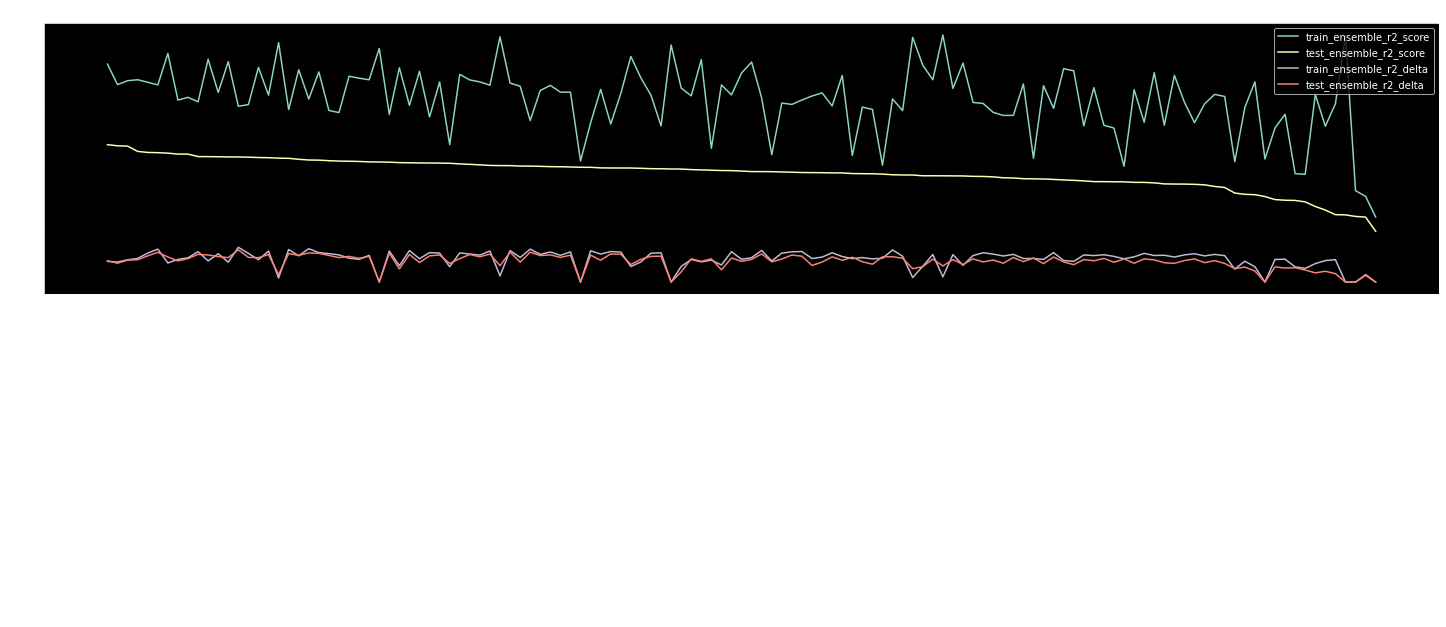

In [75]:
# Horizontal Scores

plt.subplots(figsize=(25, 5))
plt.xticks(rotation=90)
plt.title(f"Ensemble R2 Scores - Dataset '{DATASET}'")
plt.ylabel("R2 Score")

for score_name in ['train_ensemble_r2_score',
                   'test_ensemble_r2_score',
                   'train_ensemble_r2_delta',
                   'test_ensemble_r2_delta']:

    plt.plot(list(sorted_ensembles), scores[score_name], label=score_name)

plt.legend();

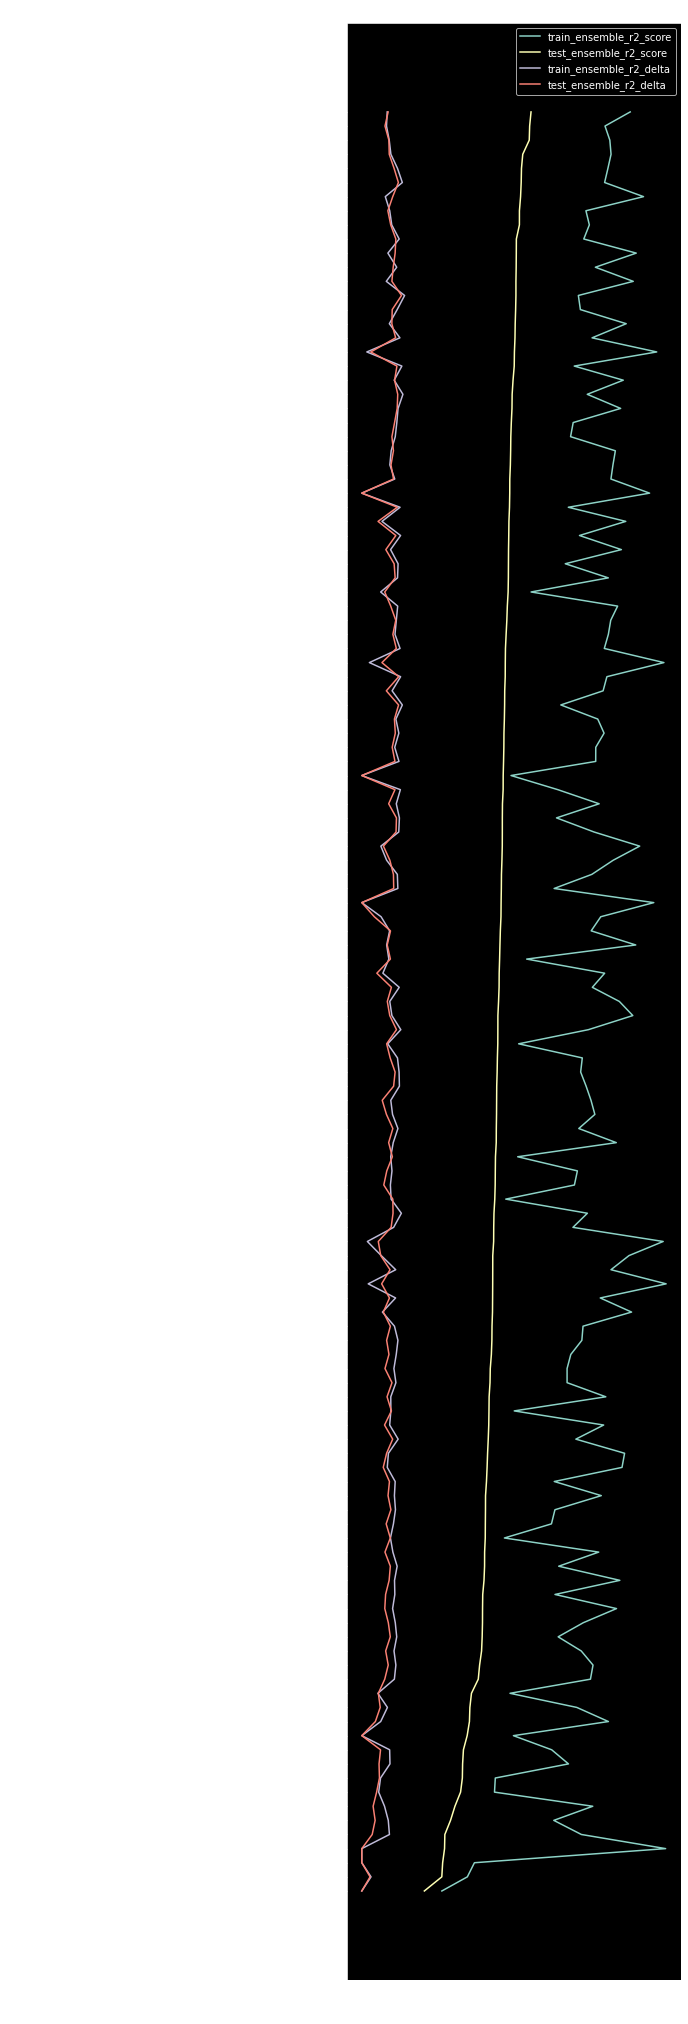

In [76]:
# Vertical Scores

plt.subplots(figsize=(6, 36))
plt.xticks(rotation=90)
plt.title(f"Ensemble R2 Scores - Dataset '{DATASET}'")
plt.xlabel('R2 Score')
plt.ylabel('Ensemble')

plt.gca().invert_yaxis()
# plt.gca().invert_xaxis()
# plt.gca().yaxis.tick_right()

for score_name in ['train_ensemble_r2_score',
                   'test_ensemble_r2_score',
                   'train_ensemble_r2_delta',
                   'test_ensemble_r2_delta']:

    plt.plot(scores[score_name], list(sorted_ensembles), label=score_name)

plt.legend();

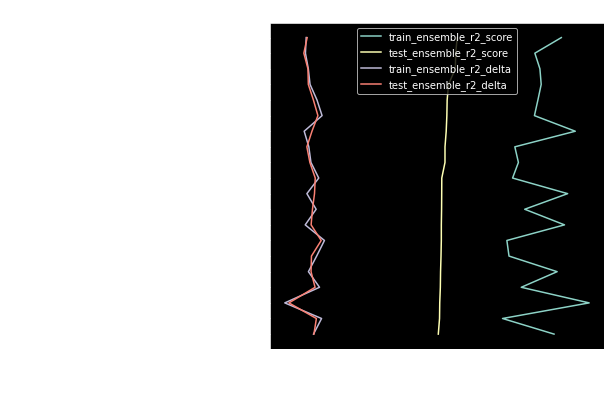

In [77]:
# TOP Vertical Scores

TOP_SCORES_COUNT = 20

top_scores = scores.head(TOP_SCORES_COUNT)

plt.subplots(figsize=(6, 6))
plt.xticks(rotation=90)
plt.title(f"Ensemble R2 Scores - Dataset '{DATASET}'")
plt.xlabel('R2 Score')
plt.ylabel('Ensemble')

plt.gca().invert_yaxis()
# plt.gca().invert_xaxis()
# plt.gca().yaxis.tick_right()

for score_name in ['train_ensemble_r2_score',
                   'test_ensemble_r2_score',
                   'train_ensemble_r2_delta',
                   'test_ensemble_r2_delta']:

    plt.plot(top_scores[score_name], sorted_ensembles[:TOP_SCORES_COUNT], label=score_name)

plt.legend();

### 1.4) XGBoost - No ensemble - Grid Search

In [7]:
PARAMETERS = {'max_depth': [None, 3, 7],
              'n_estimators': [100, 200, 300],
              'learning_rate': [0.05, 0.2],
              'reg_alpha': [0, 0.03]}


regressors = dict()

for dataset_name, dataset in datasets.items():
    
    print("dataset_name:", dataset_name)
    
    
    search_regressor = xgb.XGBRegressor()

    gridsearch = GridSearchCV(search_regressor, PARAMETERS, 
                              scoring='r2', cv=5, verbose=3)
    
    train_fields, test_fields, train_targets, test_targets = train_test_split(dataset.fields,
                                                                              dataset.targets,
                                                                              test_size=0.2)
    gridsearch.fit(X=train_fields, y=train_targets)

    regressor = gridsearch.best_estimator_    
    best_parameters = gridsearch.best_params_

    train_predictions = regressor.predict(train_fields)
    test_predictions = regressor.predict(test_fields)

    train_r2_score = r2_score(train_targets, train_predictions)
    test_r2_score = r2_score(test_targets, test_predictions)
    
    regressor_record = {'regressor': regressor,
                        'best_parameters': best_parameters,
                        'train_r2_score': train_r2_score,
                        'test_r2_score': test_r2_score}
    
    regressors[dataset_name] = regressor_record
    
    print(f"Best Parameters: {best_parameters}")
    print()
    print(f"R2 Train: {train_r2_score:.02f}")
    print(f"R2 Test:  {test_r2_score:.02f}")

dataset_name: f100
Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END learning_rate=0.05, max_depth=None, n_estimators=100, reg_alpha=0;, score=0.358 total time=   0.1s
[CV 2/5] END learning_rate=0.05, max_depth=None, n_estimators=100, reg_alpha=0;, score=0.332 total time=   0.1s
[CV 3/5] END learning_rate=0.05, max_depth=None, n_estimators=100, reg_alpha=0;, score=0.352 total time=   0.1s
[CV 4/5] END learning_rate=0.05, max_depth=None, n_estimators=100, reg_alpha=0;, score=0.364 total time=   0.1s
[CV 5/5] END learning_rate=0.05, max_depth=None, n_estimators=100, reg_alpha=0;, score=0.309 total time=   0.1s
[CV 1/5] END learning_rate=0.05, max_depth=None, n_estimators=100, reg_alpha=0.03;, score=0.350 total time=   0.1s
[CV 2/5] END learning_rate=0.05, max_depth=None, n_estimators=100, reg_alpha=0.03;, score=0.326 total time=   0.1s
[CV 3/5] END learning_rate=0.05, max_depth=None, n_estimators=100, reg_alpha=0.03;, score=0.354 total time=   0.1s
[CV 4/5] END l

In [22]:
# # Save Regressors

# with open('regressors.pkl', 'wb') as handle:
#     pickle.dump(regressors, handle, protocol=pickle.HIGHEST_PROTOCOL)

### 3) Process Results

In [13]:
# Save energies

# np.savetxt('proteins_ortools_target_100.csv', target_dataset.targets)
# np.savetxt('proteins_ortools_offtarget_100.csv', offtarget_binding_energies)

# np.savetxt('proteins_tabu_target_100.csv', target_dataset.targets)
# np.savetxt('proteins_tabu_offtarget_100.csv', offtarget_binding_energies)

In [14]:
# Load energies

proteins_ortools_target_100 = np.genfromtxt('proteins_ortools_target_100.csv')
proteins_ortools_offtarget_100 = np.genfromtxt('proteins_ortools_offtarget_100.csv')

proteins_tabu_target_100 = np.genfromtxt('proteins_tabu_target_100.csv')
proteins_tabu_offtarget_100 = np.genfromtxt('proteins_tabu_offtarget_100.csv')

In [15]:
proteins_ortools_target_100.shape, \
proteins_ortools_offtarget_100.shape, \
proteins_tabu_target_100.shape, \
proteins_tabu_offtarget_100.shape

((100226,), (100226,), (103326,), (103326,))

In [16]:
plt.style.use('default')

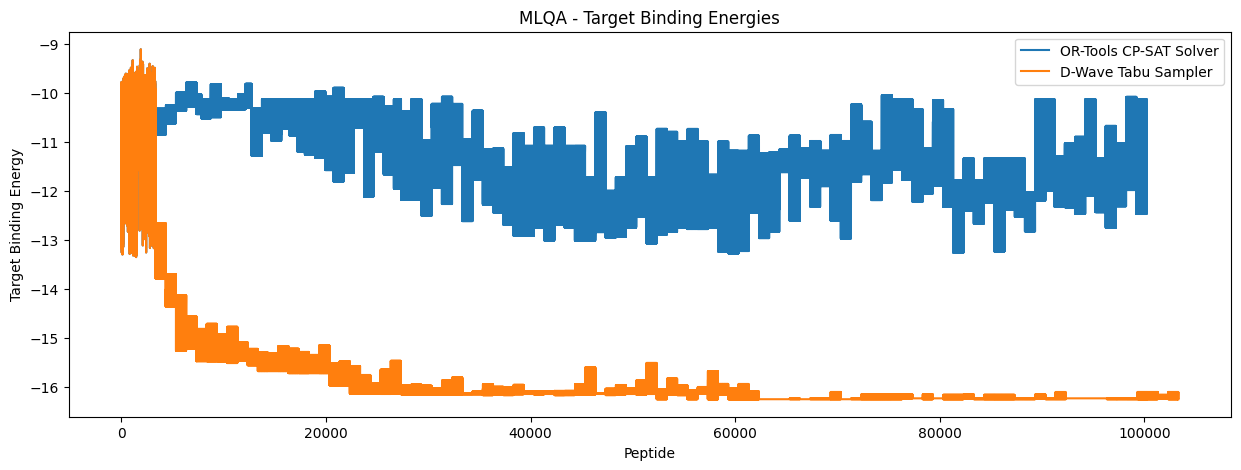

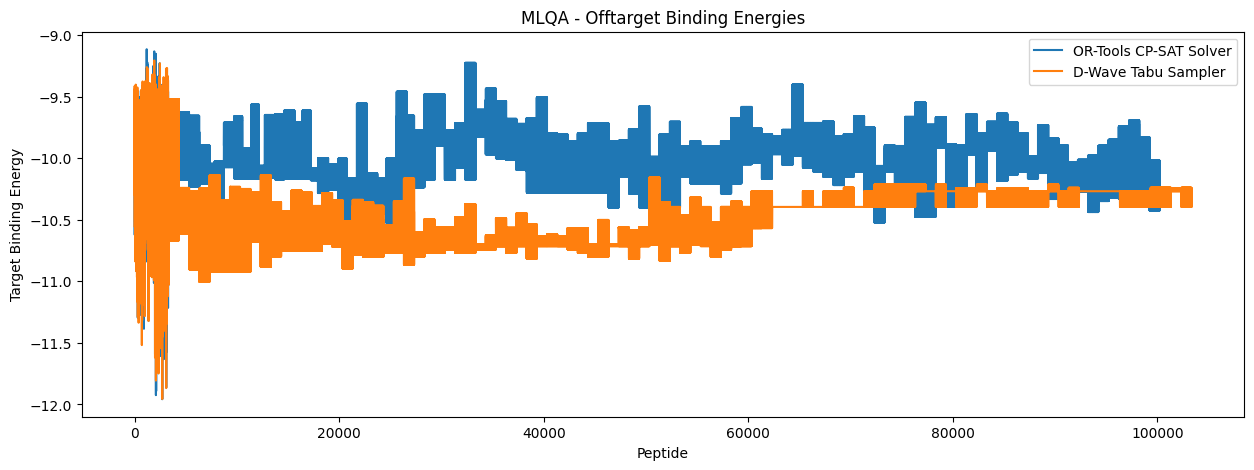

In [23]:
# Double plot

plt.figure(figsize=(15, 5))

plt.plot(proteins_ortools_target_100, color='C0', label='OR-Tools CP-SAT Solver')
plt.plot(proteins_tabu_target_100, color='C1', label='D-Wave Tabu Sampler')

plt.title("MLQA - Target Binding Energies")
plt.xlabel("Peptide")
plt.ylabel("Target Binding Energy")
plt.legend()

plt.show()


plt.figure(figsize=(15, 5))

plt.plot(proteins_ortools_offtarget_100, color='C0', label='OR-Tools CP-SAT Solver')
plt.plot(proteins_tabu_offtarget_100, color='C1', label='D-Wave Tabu Sampler')

plt.title("MLQA - Offtarget Binding Energies")
plt.xlabel("Peptide")
plt.ylabel("Target Binding Energy")
plt.legend()

plt.show()

In [64]:
# plot_samples('binding_energy')
# plot_samples('qubo_energy', color='C3')
# plot_samples('target_binding_energy', color='C6')
# plot_samples('offtarget_binding_energy', color='C7')

In [18]:
results.head(1)

,decimal,samples,bits,symbols,qubo_energy,num_occurrences,target_binding_energy,offtarget_binding_energy,binding_energy
0,2.1895087780637883e+32,"[0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, ...","[0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, ...",GPXEEVIFKELSRIIDEGNAYX,-1115.15688,3,-15.173365,-11.250477,-3.922888


In [17]:
# # Save Plot

# plt.figure(figsize=(15, 5))
# plt.title("FMQA - Dynamic Dataset")
# plt.xlabel("Peptide")
# plt.ylabel("Binding Energy")

# plt.plot(dataset.targets)
# plt.savefig('figures/proteins_fmqa_3.png');

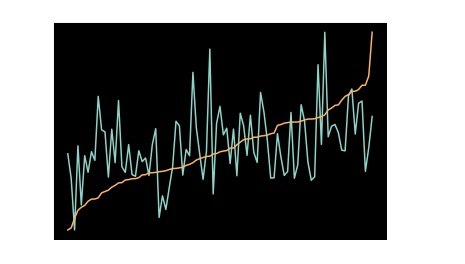

In [18]:
# Plot Top Sample Energies

plt.plot(results.binding_energy)
plt.title('Top Sample Energies')
plt.ylabel('Binding Energy')

qubo_energy_ax = plt.twinx()
qubo_energy_ax.plot(results.qubo_energy, c='C5')
qubo_energy_ax.set_ylabel('QUBO Energy')

plt.show()

### 4) D-Wave Hybrid Samplers

In [61]:
# https://docs.ocean.dwavesys.com/projects/hybrid/en/latest/intro/using.html

import dimod
import hybrid


# bqm = dimod.BinaryQuadraticModel.from_ising({}, {'ab': 1.5, 'bc': 0.5, 'ca': 0.5})

bqm = dimod.BinaryQuadraticModel.from_qubo(qubo.qubo_coefficients)

bqm.variables

Variables(range(0, 220))

In [62]:
# 1) Kerberos

sampler = hybrid.KerberosSampler()

solution = sampler.sample(bqm, 
                          max_iter=10, 
                          convergence=3,
                          qpu_sampler=SimulatedAnnealingSampler(),
                          # qpu_sampler=dimod.RandomSampler(),
                          # qpu_sampler=TabuSampler()
                         )

solution

SampleSet(rec.array([([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0], -1113.6674299, 1)],
          dtype=[('sample', 'i1', (220,)), ('energy', '<f8'), ('num_occurrences', '<i8')]), Variables(range(0, 220)), {}, 'BINARY')

In [375]:
# 2) Tabu Hybrid

sampler = hybrid.TabuProblemSampler(tenure=2, timeout=1*1000)

min_sample = hybrid.utils.min_sample(bqm)
max_sample = hybrid.utils.max_sample(bqm)

min_state = hybrid.State.from_sample(min_sample, bqm)

In [87]:
new_state = sampler.run(min_state).result()

print(new_state.samples)

   0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 ... 219       energy num_oc. ...
0  0  1  0  1  1  0  0  1  1  0  0  1  1  0  1 ...   1 -1113.237832       1 ...
['BINARY', 1 rows, 1 samples, 220 variables]


In [88]:
# 3) Branch Split

# bqm = dimod.BinaryQuadraticModel({t: 0 for t in range(10)},
#                                  {(t, (t+1) % 10): 1 for t in range(10)},
#                                  0, 'SPIN')
# bqm

In [110]:
branch = (hybrid.EnergyImpactDecomposer(size=10, min_gain=-10) |
          hybrid.TabuSubproblemSampler(num_reads=5) |
          hybrid.SplatComposer())

branch

Branch(components=(EnergyImpactDecomposer(size=10, min_gain=-10, rolling=True, rolling_history=1.0, silent_rewind=True), TabuSubproblemSampler(num_reads=5, tenure=None, timeout=100, initial_states_generator='random'), SplatComposer()))

In [118]:
new_state = branch.next(min_state)

print(new_state.subsamples) 

  160 161 162 163 164 165 166 167 168 169     energy num_oc. num_re.
0   0   1   0   1   0   1   1   0   0   1 -50.088097       1      11
1   0   1   0   1   0   1   1   0   0   1 -50.088097       1      11
2   0   1   0   1   0   1   1   0   0   1 -50.088097       1      11
3   0   1   0   1   0   1   1   0   0   1 -50.088097       1      12
4   0   1   0   1   0   1   1   0   0   1 -50.088097       1      12
['BINARY', 5 rows, 5 samples, 10 variables]


In [123]:
# 4) Racing Branches

# bqm = dimod.BinaryQuadraticModel({}, {'ab': 1, 'bc': -1, 'ca': 1}, 0, dimod.SPIN)

iteration = hybrid.RacingBranches(
    hybrid.InterruptableTabuSampler(),
    hybrid.EnergyImpactDecomposer(size=2)
    # | hybrid.QPUSubproblemAutoEmbeddingSampler()
    | hybrid.SimulatedAnnealingSubproblemSampler(num_sweeps=1000)
    | hybrid.SplatComposer()
) | hybrid.ArgMin()

In [128]:
workflow = hybrid.LoopUntilNoImprovement(iteration, convergence=3)

init_state = hybrid.State.from_problem(bqm)
final_state = workflow.run(init_state).result()

print(final_state.samples)

   0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 ... 219       energy num_oc. ...
0  0  1  0  1  1  0  0  1  1  0  0  1  1  0  1 ...   0 -1113.629344       1 ...
['BINARY', 1 rows, 1 samples, 220 variables]


In [142]:
# 5) Rolling QUBO Decomposition

subproblem = hybrid.EnergyImpactDecomposer(size=50, rolling_history=0.15)
# subsampler = hybrid.QPUSubproblemAutoEmbeddingSampler() | hybrid.SplatComposer()
subsampler = hybrid.SimulatedAnnealingSubproblemSampler(num_sweeps=1000) | hybrid.SplatComposer()

iteration = hybrid.RacingBranches(
    hybrid.InterruptableTabuSampler(),
    subproblem | subsampler
) | hybrid.ArgMin()

workflow = hybrid.LoopUntilNoImprovement(iteration, convergence=3)

In [145]:
init_state = hybrid.State.from_problem(bqm)
final_state = workflow.run(init_state).result()

print(final_state.samples)

   0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 ... 219       energy num_oc. ...
0  0  1  0  1  1  0  0  1  1  0  0  1  1  0  1 ...   0 -1113.653857       1 ...
['BINARY', 1 rows, 1 samples, 220 variables]


In [156]:
# 6) Map Reduce

subproblem = hybrid.Unwind(
    hybrid.EnergyImpactDecomposer(size=50, rolling_history=0.15)
)

def merge_substates(_, substates):
    a, b = substates
    return a.updated(subsamples=hybrid.hstack_samplesets(a.subsamples, b.subsamples))

subsampler = hybrid.Map(
    # hybrid.QPUSubproblemAutoEmbeddingSampler()
    hybrid.SimulatedAnnealingSubproblemSampler(num_sweeps=1000)
) | hybrid.Reduce(
    hybrid.Lambda(merge_substates)
) | hybrid.SplatComposer()

In [157]:
iteration = hybrid.RacingBranches(
    hybrid.InterruptableTabuSampler(),
    subproblem | subsampler
) | hybrid.ArgMin()

workflow = hybrid.LoopUntilNoImprovement(iteration, convergence=3)

In [159]:
init_state = hybrid.State.from_problem(bqm)
final_state = workflow.run(init_state).result()

print(final_state.samples)

   0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 ... 219       energy num_oc. ...
0  0  1  0  1  1  0  0  1  1  0  0  1  1  0  1 ...   0 -1113.653857       1 ...
['BINARY', 1 rows, 1 samples, 220 variables]


In [162]:
# 7) Dimod Conversion

dimod_sampler = hybrid.HybridSampler(workflow)

In [ ]:
# 8) Hybrid Utilities

# https://docs.ocean.dwavesys.com/projects/hybrid/en/latest/reference/utilities.html#utilities-hybrid

In [379]:
VARIABLES_MASK = [0, 1, 100]

reduced_bqm = hybrid.bqm_reduced_to(bqm, VARIABLES_MASK, max_sample)

reduced_bqm

BinaryQuadraticModel({0: -9.999999999999844, 1: -10.9996299950288, 100: 9.999999999999988}, {(1, 0): 20.000000000000004, (100, 0): -2.780666561132284e-28, (100, 1): -1.226281996750283e-15}, -18.560661141672455, 'BINARY')

In [382]:
induced_bqm = hybrid.bqm_induced_by(bqm, VARIABLES_MASK, max_sample)

induced_bqm

BinaryQuadraticModel({0: -9.999999999999844, 1: -10.9996299950288, 100: 9.999999999999988}, {(1, 0): 20.000000000000004, (100, 0): -2.780666561132284e-28, (100, 1): -1.226281996750283e-15}, 0.0, 'BINARY')

In [219]:
reduced_min_sample = hybrid.utils.min_sample(reduced_bqm)

In [224]:
print(hybrid.random_sample(reduced_bqm))

{0: 1, 1: 0, 100: 1}


In [204]:
hybrid.flip_energy_gains(reduced_bqm, reduced_min_sample)

[(-10.0, 100), (-10.0, 0)]

In [228]:
hybrid.random_sample(reduced_bqm)

{0: 1, 1: 0, 100: 1}

In [400]:
hybrid.select_localsearch_adversaries(bqm, max_sample, max_n=10)

[122, 151, 206, 147, 8, 137, 111, 46, 18, 161]

In [447]:
# 9) Stacked Sampleset

STACK_SIZE = 5
SHOTS_COUNT = 3

variables = reduced_bqm.variables
vartype = reduced_bqm.vartype

samples = [hybrid.random_sample(reduced_bqm) for i in range(SHOTS_COUNT)]

dimod_samples = dimod.as_samples(samples)

energies = reduced_bqm.energies(samples)

sampleset = dimod.SampleSet.from_samples(samples,
                                         energy=energies, vartype=vartype,
                                         info=None, num_occurrences=None, 
                                         aggregate_samples=False, sort_labels=False)

samplesets = [sampleset for i in range(STACK_SIZE)]

stacked_sampleset = hybrid.vstack_samplesets(*samplesets)

stacked_sampleset

SampleSet(rec.array([([0, 1, 0], -29.56029114, 1), ([0, 1, 0], -29.56029114, 1),
           ([1, 1, 1],  -9.56029114, 1), ([0, 1, 0], -29.56029114, 1),
           ([0, 1, 0], -29.56029114, 1), ([1, 1, 1],  -9.56029114, 1),
           ([0, 1, 0], -29.56029114, 1), ([0, 1, 0], -29.56029114, 1),
           ([1, 1, 1],  -9.56029114, 1), ([0, 1, 0], -29.56029114, 1),
           ([0, 1, 0], -29.56029114, 1), ([1, 1, 1],  -9.56029114, 1),
           ([0, 1, 0], -29.56029114, 1), ([0, 1, 0], -29.56029114, 1),
           ([1, 1, 1],  -9.56029114, 1)],
          dtype=[('sample', 'i1', (3,)), ('energy', '<f8'), ('num_occurrences', '<i8')]), Variables([0, 1, 100]), {}, 'BINARY')

In [333]:
stacked_sampleset.aggregate()

SampleSet(rec.array([([0, 0, 1], -10., 10), ([1, 1, 1], -10.,  5)],
          dtype=[('sample', 'i1', (3,)), ('energy', '<f8'), ('num_occurrences', '<i8')]), Variables([0, 1, 100]), {}, 'BINARY')

In [ ]:
# 10) Other

In [354]:
random_sample = hybrid.random_sample_seq(5, 'BINARY')

random_sample

{0: 0, 1: 0, 2: 1, 3: 1, 4: 1}

In [355]:
hybrid.sample_as_dict(random_sample)

{0: 0, 1: 0, 2: 1, 3: 1, 4: 1}

In [356]:
hybrid.sample_as_list(random_sample)

[0, 0, 1, 1, 1]

In [357]:
hybrid.cpu_count()

12

In [414]:
hybrid.select_random_subgraph(bqm, 5)

[30, 72, 189, 193, 119]

In [435]:
random_sample = hybrid.random_sample(reduced_bqm)

hybrid.updated_sample(random_sample, {0: 1, 1: 0})

{0: 1, 1: 0, 100: 1}